In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statistics import mean

#Classifiers
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
import time
import warnings
warnings.filterwarnings("ignore")

plt.style.use('default')

In [2]:
#Classifiers to be tested
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

In [19]:
df = pd.read_csv('features/features.csv', header=None)
y = pd.read_csv('features/labels.csv',header=None)
data = pd.read_csv('features/data.csv',header=None)

# Train test split

In [20]:
def train_test_data(df,y, split=0.33):
    '''
    Accepts a dataframe of values and splits them into stratified train and test datasets. 
    Converts to a dictionary that has 12 features and 8 channels for each feature
    
    input:  df = data to split in the form of a dataframe
            y = labels
            split =  test_size for the split
    
    output: total = feature data converted to dictionary without split
            train = train split for feature data
            test = test split for feature data
            y_train = train data labels
            y_test = test data labels
    '''
    X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=split, random_state=42, stratify=y)

    features = ['entropy','mav','wl','ssc','rootms','ssi','variance','tm3','logd','aac','zc', 'iemg'];
    cols = ['c1','c2','c3','c4','c5','c6','c7','c8']
    total = {}
    test = {}
    train = {}
    i = 0
    j = 8
    for x in features:
        total[x] = df.iloc[:,i:j]
        total[x].columns = cols
        train[x] = X_train.iloc[:,i:j]
        train[x].columns = cols
        test[x] = X_test.iloc[:,i:j]
        test[x].columns = cols
        i += 8; j+=8
    
    return train, test, y_train, y_test, total

# Average correlation b/w features taking the avg of all channels

In [41]:
# names = ['entropy','mav','wl','ssc','rootms','ssi','variance','tm3','logd','aac','zc', "iemg" ]

def average_signal(total):
    avg_sig = pd.DataFrame(columns=names)
    for y in range(len(total['mav'])):
        signal = []
        for x in total:
            signal.append(mean(total[x].iloc[y]))
        avg_sig.loc[y] = signal
    return avg_sig

def correlation_table(total):
    return average_signal(total).corr()

<AxesSubplot:>

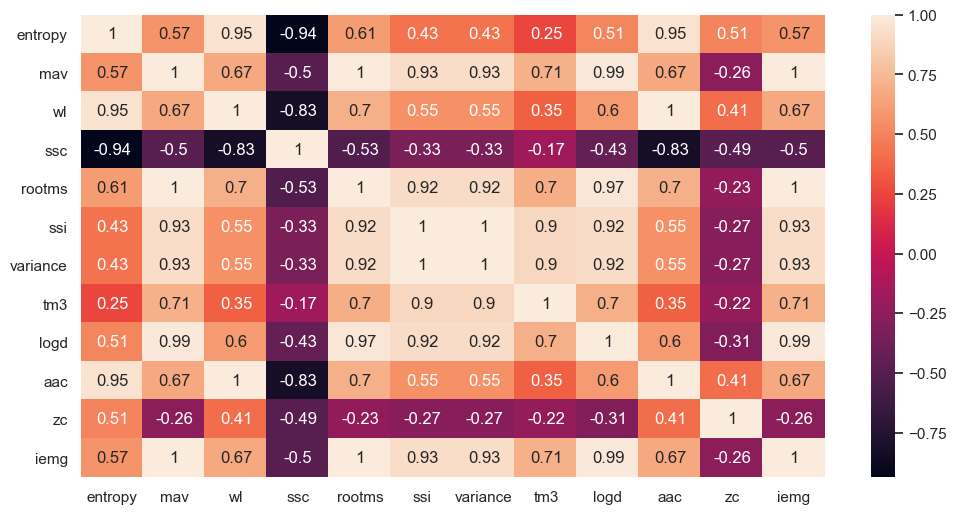

In [6]:
plt.figure(figsize=(12,6))
sns.set(font_scale=1)
sns.heatmap(avg_sig.corr(),annot=True)

# Correlation of individual features for each channel

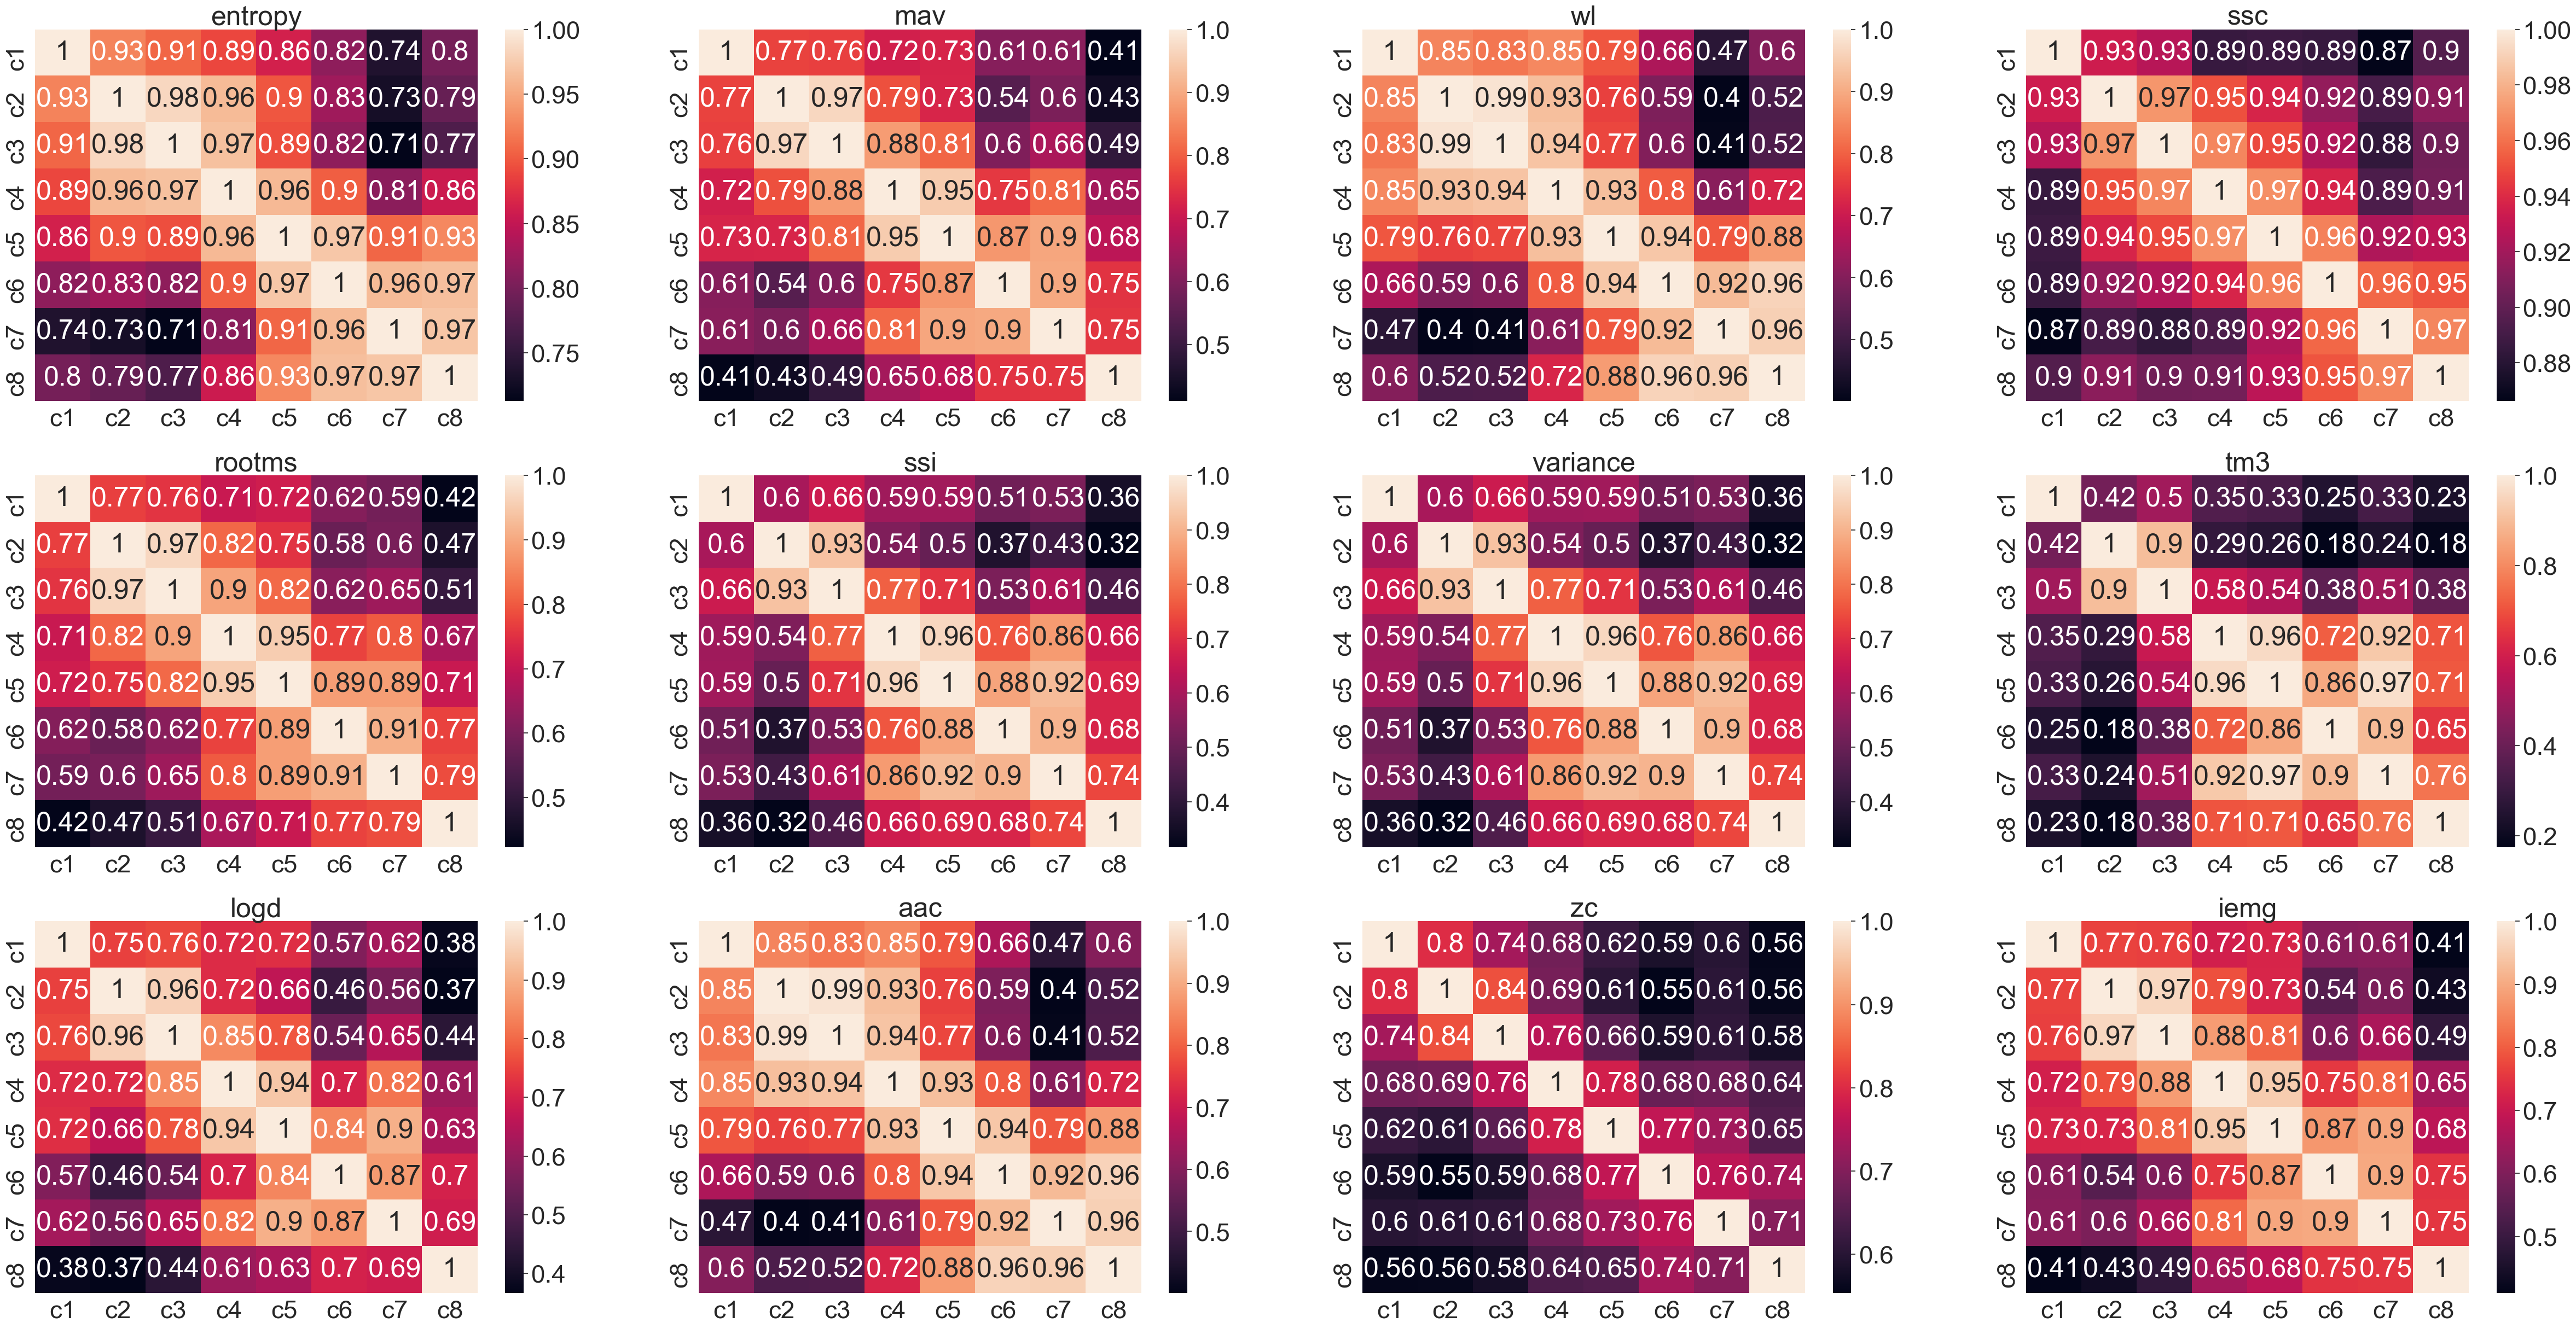

In [7]:
plt.figure(figsize=(60,30))
sns.set(font_scale=3)
for i in range(1,13):
    plt.subplot(3,4,i)
    sns.heatmap(total[features[i-1]].corr(),annot=True)
    plt.title(features[i-1])

# Correlation of gestures between channels

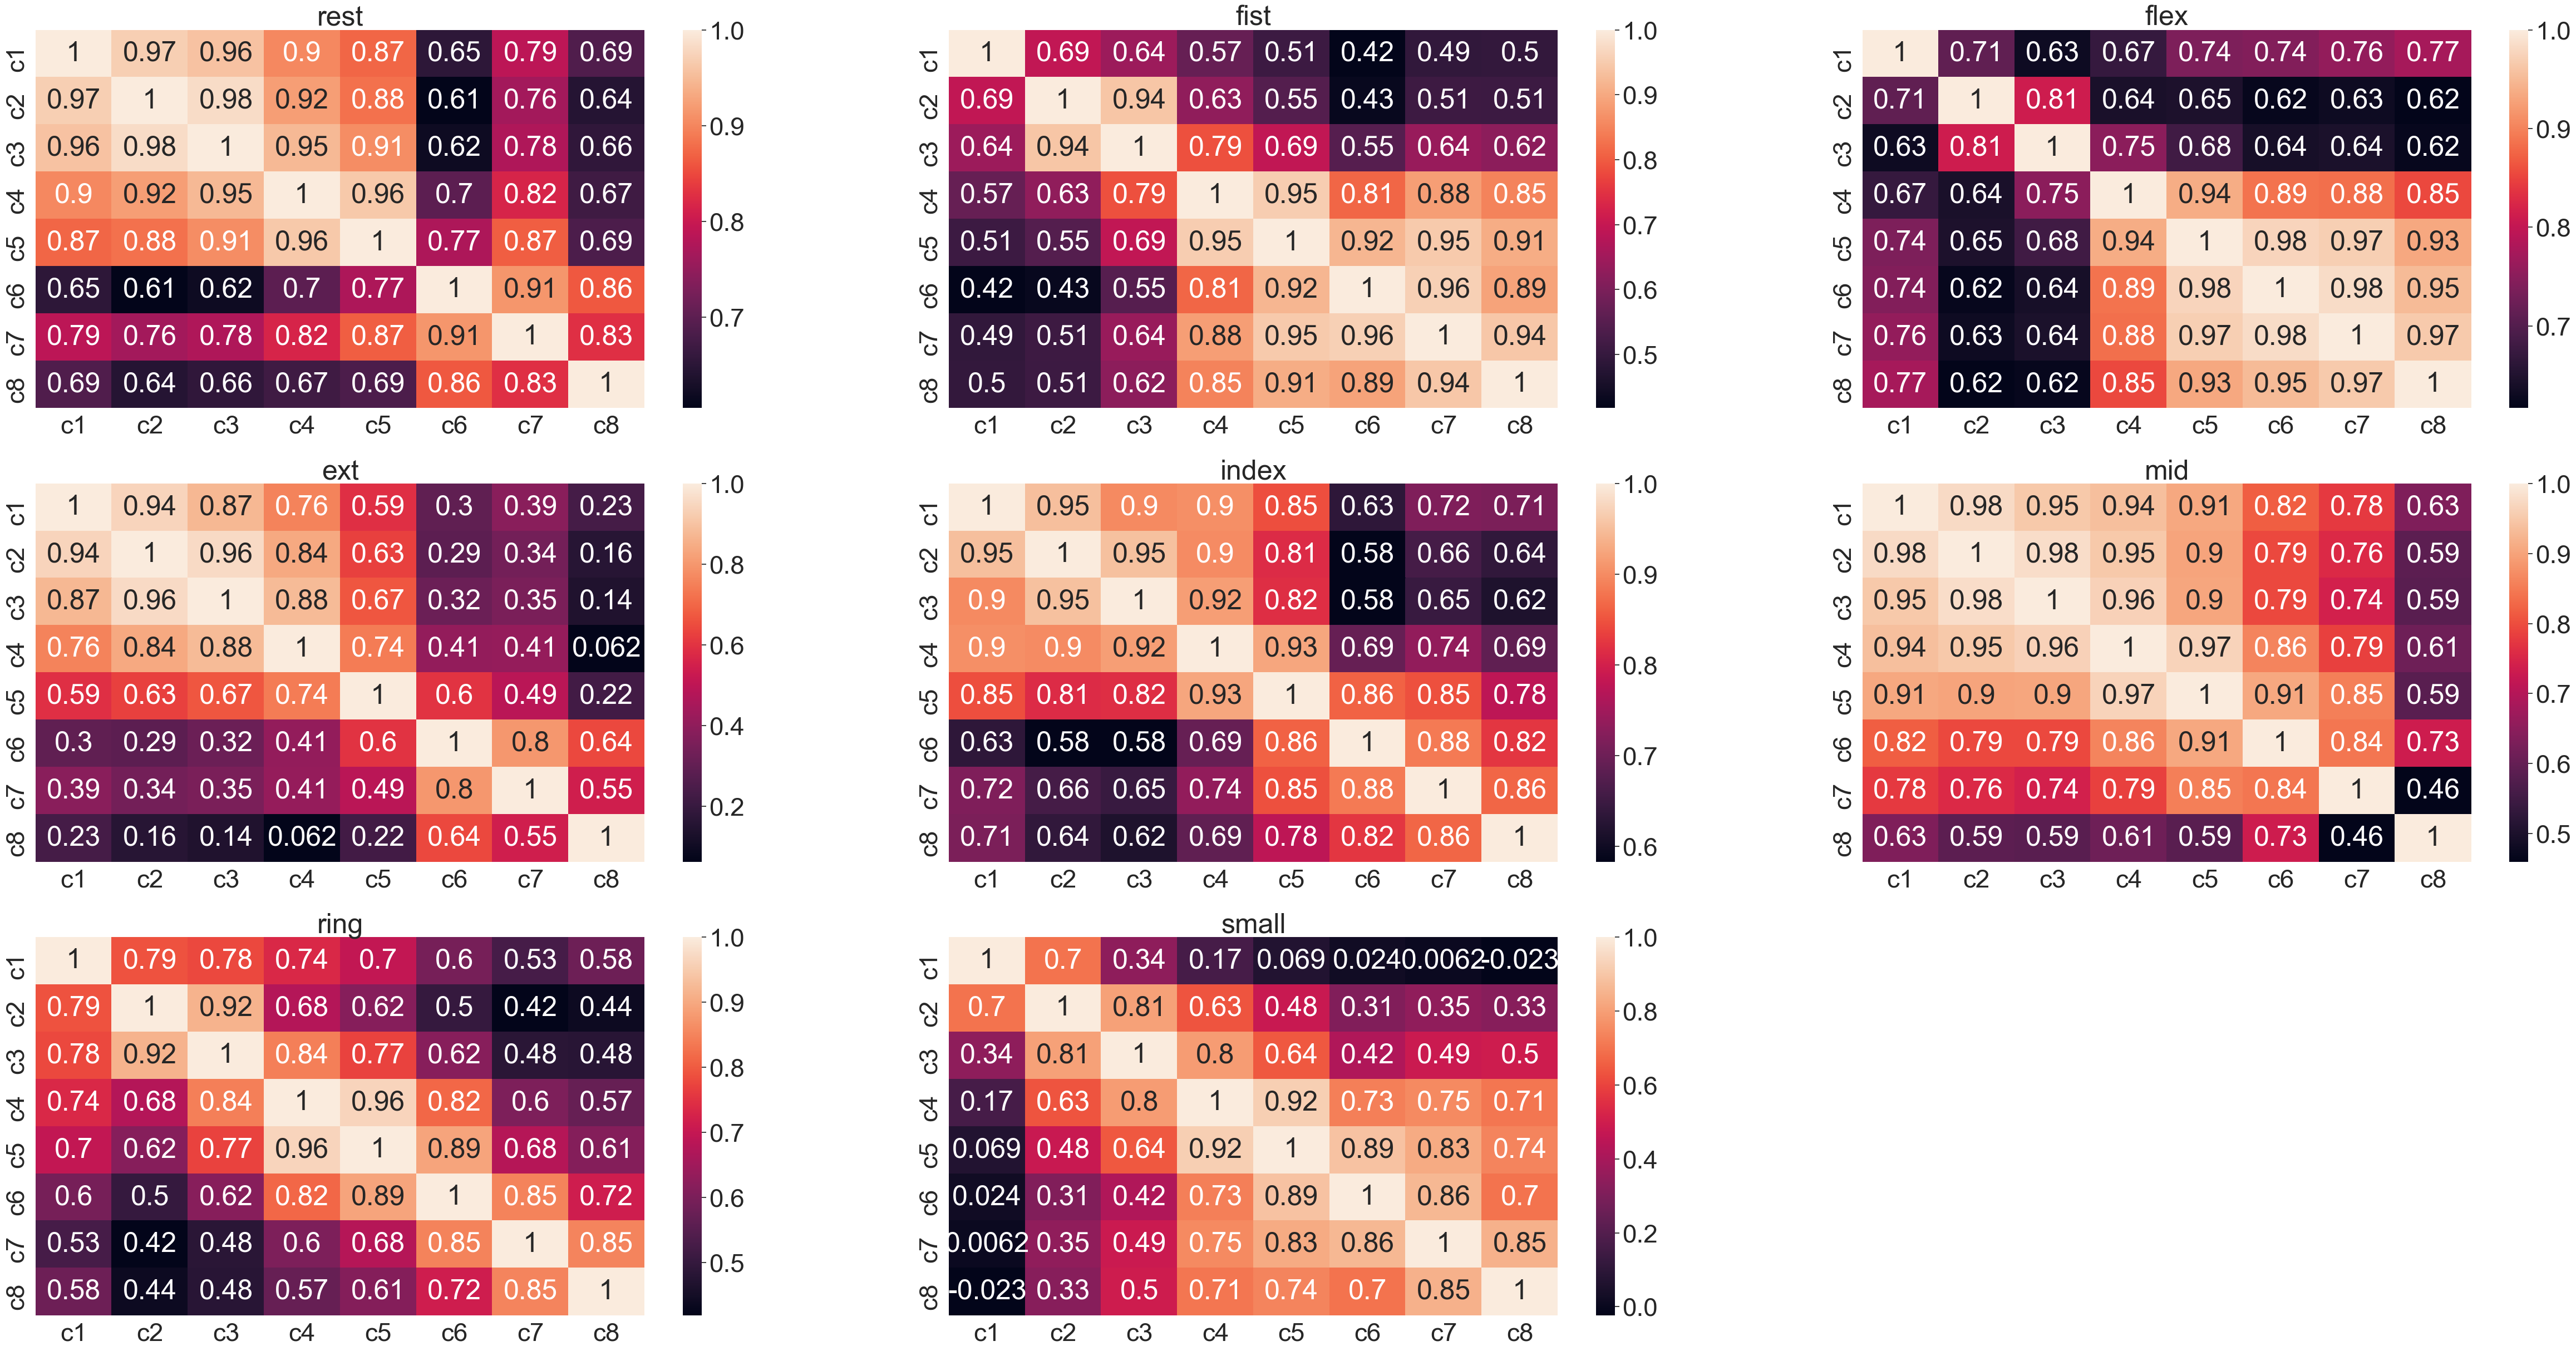

In [7]:
#I want to correlate each gesture between channels. so I have to filter by gesture

#I want to see how the original signal is correlated between channels for each gesture
data.columns = cols+['labels']

rest = data[data['labels']==0]
fist = data[data['labels'] == 1]
flex = data[data['labels'] == 2]
ext = data[data['labels'] == 3]
index = data[data['labels'] == 6]
mid = data[data['labels'] == 7]
ring = data[data['labels'] == 8]
small = data[data['labels'] == 9]

gestures = [rest,fist,flex,ext,index,mid,ring,small]
gest_name = ['rest','fist','flex','ext','index','mid','ring','small']

plt.figure(figsize=(60,30))
sns.set(font_scale=3)
for i in range(1,9):
    plt.subplot(3,3,i)
    sns.heatmap(gestures[i-1].iloc[:,:8].corr(),annot=True)
    plt.title(gest_name[i-1])

# Testing 2 features at a time

In [96]:
def two_feat_cor(data,features, names, classifiers, cor_table, plot=True):
    '''
    Creates a dataframe with features being tested, correlation values 
    and classification accuracy for three classifiers
    
    input:  features: names of features
            names: names of classifiers
            classifiers: classifiers to be tested
    
    output: Dataframe
    
    '''
    #Create table
    colu = ['feat1','feat2','corr'] + names
    tablet = pd.DataFrame(columns = colu)
    feat = features.copy()
    #Plug in values
    i = 0
    for x in feat:
        for y in feat:
            #print('Features used: '+ x +', '+ y)
            yolo = pd.concat([data[0][x],data[0][y]],axis=1)
            yolo2 = pd.concat([data[1][x],data[1][y]],axis=1)

            c = abs(cor_table[x][y])
            
            values = [x,y,c]
            for clas in classifiers:
                #print('Evaluating: ' + str(clas))
                values.append(clas.fit(yolo,y_train).score(yolo2,y_test))
            tablet.loc[i] = values
            i +=1
        feat.remove(x)

    tablet['corr'] = abs(tablet['corr'])
    
    print()
    if plot == True:
        plotting(names,'corr',tablet)
    
    return tablet

# def plotting(names,table):
#     for x in names:
#         plt.scatter(table['corr'],table[x])
#         plt.grid(True)
#         print(x + ': {:.2f}'.format(table['corr'].corr(table[x].astype('float64'))))
#     plt.legend(names)

# Classifier testing


Nearest Neighbors: 0.12
RBF SVM: 0.14
Decision Tree: -0.28
Random Forest: -0.50
Neural Net: -0.04
AdaBoost: -0.11
Naive Bayes: -0.18
QDA: -0.52

Time taken: 73:50.22


Nearest Neighbors: 0.19
RBF SVM: -0.48
Decision Tree: -0.29
Random Forest: -0.41
Neural Net: -0.50
AdaBoost: -0.11
Naive Bayes: -0.38
QDA: -0.52

Time taken: 102:16.15



Text(0.5, 1.0, 'Scaled')

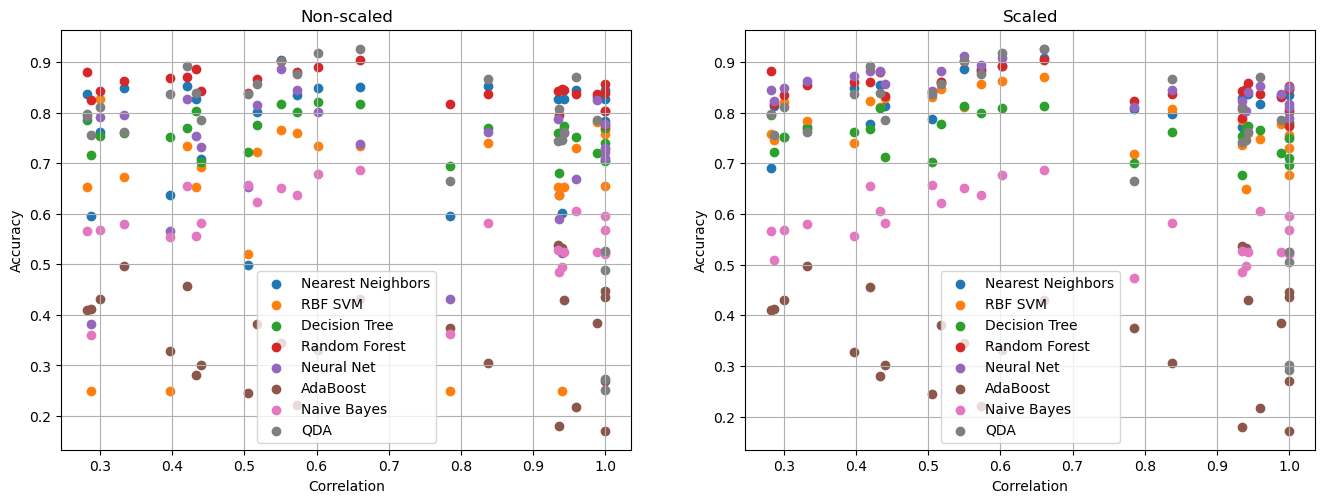

In [98]:
plt.figure(figsize=(25,12))
plt.subplot(2,3,1)
start = time.time()
table = two_feat_cor(data,features,names,classifiers,avg_sig)
end = time.time() - start
print()
hours = int(end)
minutes = (end*60) % 60
seconds = (end*3600) % 60

print("Time taken: %d:%02d.%02d" % (hours, minutes, seconds))
print()
plt.title('Non-scaled')
plt.subplot(2,3,2)
start = time.time()
table_scale = two_feat_cor(scaled_data,features,names,classifiers,avg_sig)
end = time.time() - start
print()
hours = int(end)
minutes = (end*60) % 60
seconds = (end*3600) % 60

print("Time taken: %d:%02d.%02d" % (hours, minutes, seconds))
print()
plt.title('Scaled')

In [105]:
table.sort_values(by='Nearest Neighbors', ascending=False)

feat1     feat2      corr  Nearest Neighbors   RBF SVM  Decision Tree  \
11        wl  variance  0.550162           0.904059  0.766298       0.817958   
10        wl       ssc  0.837498           0.852399  0.739237       0.769988   
14        wl        zc  0.419894           0.852399  0.733087       0.768758   
8         wl       mav  0.660118           0.851169  0.734317       0.817958   
13        wl      logd  0.602273           0.848708  0.733087       0.821648   
16  variance       ssc  0.332578           0.848708  0.672817       0.758918   
9         wl        wl  1.000000           0.845018  0.765068       0.740467   
2    entropy        wl  0.959149           0.845018  0.730627       0.751538   
20  variance        zc  0.282316           0.837638  0.653137       0.785978   
1    entropy       mav  0.572698           0.833948  0.758918       0.801968   
21      logd       mav  0.988928           0.830258  0.782288       0.720787   
17  variance  variance  1.000000           0.827798  0.655597       0.768758   
4    entropy  variance  0.432685           0.827798  0.651907       0.803198   
19  variance      logd  0.934287           0.827798  0.651907       0.758918   
15  variance       mav  0.943334           0.827798  0.653137       0.773678   
24      logd      logd  1.000000           0.803198  0.757688       0.703567   
6    entropy      logd  0.517301           0.801968  0.722017       0.776138   
0    entropy   entropy  1.000000           0.783518  0.728167       0.707257   
25      logd        zc  0.299827           0.761378  0.826568       0.752768   
22      logd       ssc  0.440420           0.708487  0.692497       0.702337   
12        wl       tm3  0.397204           0.637146  0.249692       0.751538   
3    entropy       ssc  0.935297           0.637146  0.637146       0.680197   
18  variance       tm3  0.939648           0.601476  0.249692       0.762608   
5    entropy       tm3  0.286904           0.595326  0.249692       0.717097   
23      logd       tm3  0.784878           0.595326  0.249692       0.693727   
7    entropy        zc  0.504753           0.498155  0.520295       0.722017   

    Random Forest  Neural Net  AdaBoost  Naive Bayes       QDA  
11       0.901599    0.885609  0.344403     0.650677  0.902829  
10       0.837638    0.761378  0.305043     0.581796  0.865929  
14       0.869619    0.826568  0.456335     0.655597  0.892989  
8        0.904059    0.738007  0.430504     0.686347  0.926199  
13       0.890529    0.801968  0.330873     0.677737  0.917589  
16       0.863469    0.795818  0.496925     0.579336  0.762608  
9        0.838868    0.729397  0.170972     0.595326  0.526445  
2        0.836408    0.669127  0.217712     0.605166  0.869619  
20       0.879459    0.793358  0.409594     0.565806  0.797048  
1        0.880689    0.845018  0.221402     0.637146  0.876999  
21       0.837638    0.824108  0.383764     0.523985  0.784748  
17       0.856089    0.709717  0.435424     0.523985  0.252153  
4        0.886839    0.752768  0.280443     0.555966  0.838868  
19       0.842558    0.787208  0.537515     0.527675  0.742927  
15       0.845018    0.760148  0.429274     0.525215  0.762608  
24       0.803198    0.777368  0.446494     0.520295  0.273063  
6        0.865929    0.814268  0.381304     0.622386  0.857319  
0        0.774908    0.722017  0.269373     0.568266  0.489545  
25       0.842558    0.790898  0.430504     0.568266  0.811808  
22       0.842558    0.731857  0.301353     0.581796  0.784748  
12       0.868389    0.565806  0.328413     0.554736  0.837638  
3        0.795818    0.589176  0.179582     0.484625  0.808118  
18       0.846248    0.522755  0.532595     0.494465  0.746617  
5        0.824108    0.382534  0.412054     0.360394  0.756458  
23       0.817958    0.431734  0.373924     0.362854  0.664207  
7        0.838868    0.653137  0.244772     0.656827  0.836408

In [102]:
table_scale['Nearest Neighbors'].mean()

0.8207493613397673

# Three feature set

In [95]:
def three_feat_cor(data, features, clas_names, cor_table,classifiers, repetition=True, plot=True):
    '''
    Creates a dataframe of all different combinations of 3 features, correlation values,
    correlation variance and classification accuracy for three classifiers
    
    Dictionary of values is provided outside the the function
    
    Later: Maybe take test and train dfs as arguments
    
    input:  data: train and test data, 
                  data[0]=x_train, data[1]=x_test, data[2]=y_train,data[3]=y_test
            features: names of features
            clas_names: names of classifiers
            cor_table: correlation table for features
            classifiers: classifiers to be evaluated
            repetition: features to be repeated in classifications
            plot: plot the results
    
    output: Dataframe
    
    '''
    #Create table
    colu = ['feat1','feat2','feat3','corr', 'var'] +clas_names
    tablet = pd.DataFrame(columns = colu)
    feat = features.copy()
    #Plug in values
    i = 0
    for x in feat:
        for y in feat:
            for z in feat:
                if repetition == True:
                    tablet.loc[i] = compute(data,x,y,z,tablet, cor_table, classifiers)
                    i+=1
                else:
                    if x != y and x!=z and y!=z: #check that features are not the same
                        tablet.loc[i] = compute(data,x,y,z,tablet, cor_table, classifiers)
                        i+=1
                         
        feat.remove(x)
    
    print()
    if plot == True:
        plotting(clas_names,'corr',tablet)
    
    return tablet

def compute(data,x,y,z,tablet,cor_table, classifiers):
    ''' Helper function for three_feat_cor
        Calculates correlation, variance of correlation and classification accuracy
    '''
    #print(x,y,z)
    X_train = pd.concat([data[0][x],data[0][y],data[0][z]],axis=1)
    X_test = pd.concat([data[1][x],data[1][y],data[1][z]],axis=1)
    y_train = data[2]
    y_test = data[3]

    c1 = abs(cor_table[x][y])
    c2 = abs(cor_table[x][z])
    c3 = abs(cor_table[y][z])
    c = (c1+c2+c3)/3 #correlation
    v = abs(c1-c2)+abs(c1-c3)+abs(c3-c2) #variation of correlation

    values = [x,y,z,c,v]
    for clas in classifiers:
        #print('Evaluating: ' + str(clas))
        values.append(clas.fit(X_train,y_train).score(X_test,y_test))
    
    return values
    
def plotting(names,x_axis,table):
    '''Plot the results of three_feat_cor'''
    for x in names:
        plt.scatter(table[x_axis],table[x])
        plt.grid(True)
        print(x + ': {:.2f}'.format(table[x_axis].corr(table[x].astype('float64'))))
    plt.legend(names)
    plt.xlabel('Correlation')
    plt.ylabel('Accuracy')

# Features and classifiers to be tested

In [50]:
names = ["Nearest Neighbors",  
         "RBF SVM", 
         "Decision Tree", 
         "Random Forest", 
         "Neural Net", 
         "AdaBoost",
         "Naive Bayes", 
         "QDA"
        ]

classifiers = [
    KNeighborsClassifier(),
    SVC(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    MLPClassifier(),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis()
    ]

features = ['entropy','mav','wl','ssc','variance','tm3','logd','zc']

# Train test split of data and calculation of correlation table

In [21]:
train, test, y_train, y_test, total = train_test_data(df,y)
data = [train, test, y_train, y_test, total]

avg_sig = correlation_table(total)

# 3 feat test WITH repetition of features


Nearest Neighbors: 0.16
RBF SVM: 0.22
Decision Tree: -0.27
Random Forest: -0.44
Neural Net: 0.07
AdaBoost: -0.07
Naive Bayes: -0.04
QDA: -0.47

Time taken: 7:42.04



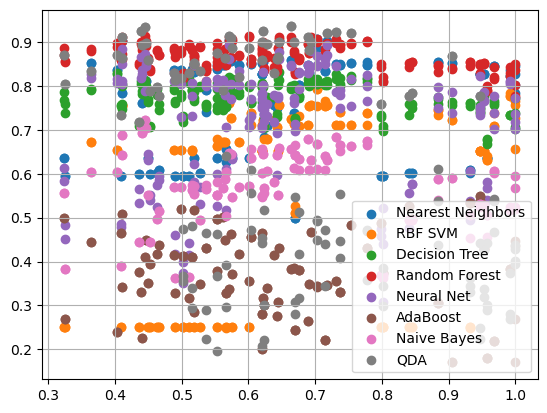

In [60]:
start = time.time()
table_repetitions = three_feat_cor(data,features, names, avg_sig.corr(), classifiers, repetition=True, plot=True)
end = time.time() - start
end = end/60
print()
hours = int(end)
minutes = (end*60) % 60
seconds = (end*3600) % 60

print("Time taken: %d:%02d.%02d" % (hours, minutes, seconds))
print()


# 3 feat test WITHOUT repetition of features


Nearest Neighbors: 0.01
RBF SVM: -0.01
Decision Tree: -0.17
Random Forest: -0.25
Neural Net: -0.07
AdaBoost: 0.18
Naive Bayes: -0.14
QDA: -0.17

Time taken: 3:48.43



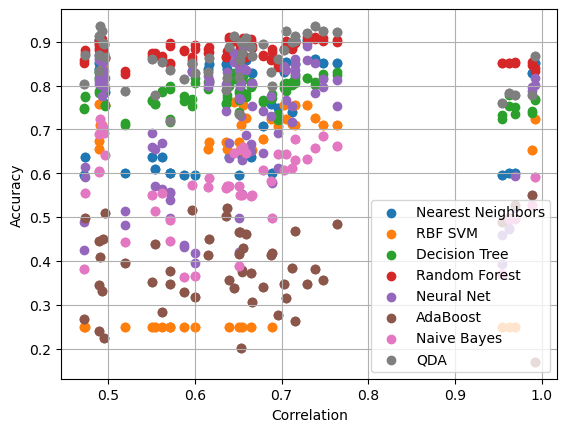

In [54]:
features = ['entropy','mav','wl','ssc','variance','tm3','logd','zc']

start = time.time()
table_no_rep = three_feat_cor(data,features, names, avg_sig.corr(), classifiers, repetition=False, plot=True)
end = time.time() - start

end = end/60

print()
hours = int(end)
minutes = (end*60) % 60
seconds = (end*3600) % 60

print("Time taken: %d:%02d.%02d" % (hours, minutes, seconds))
print()

# Repetition vs No Reps

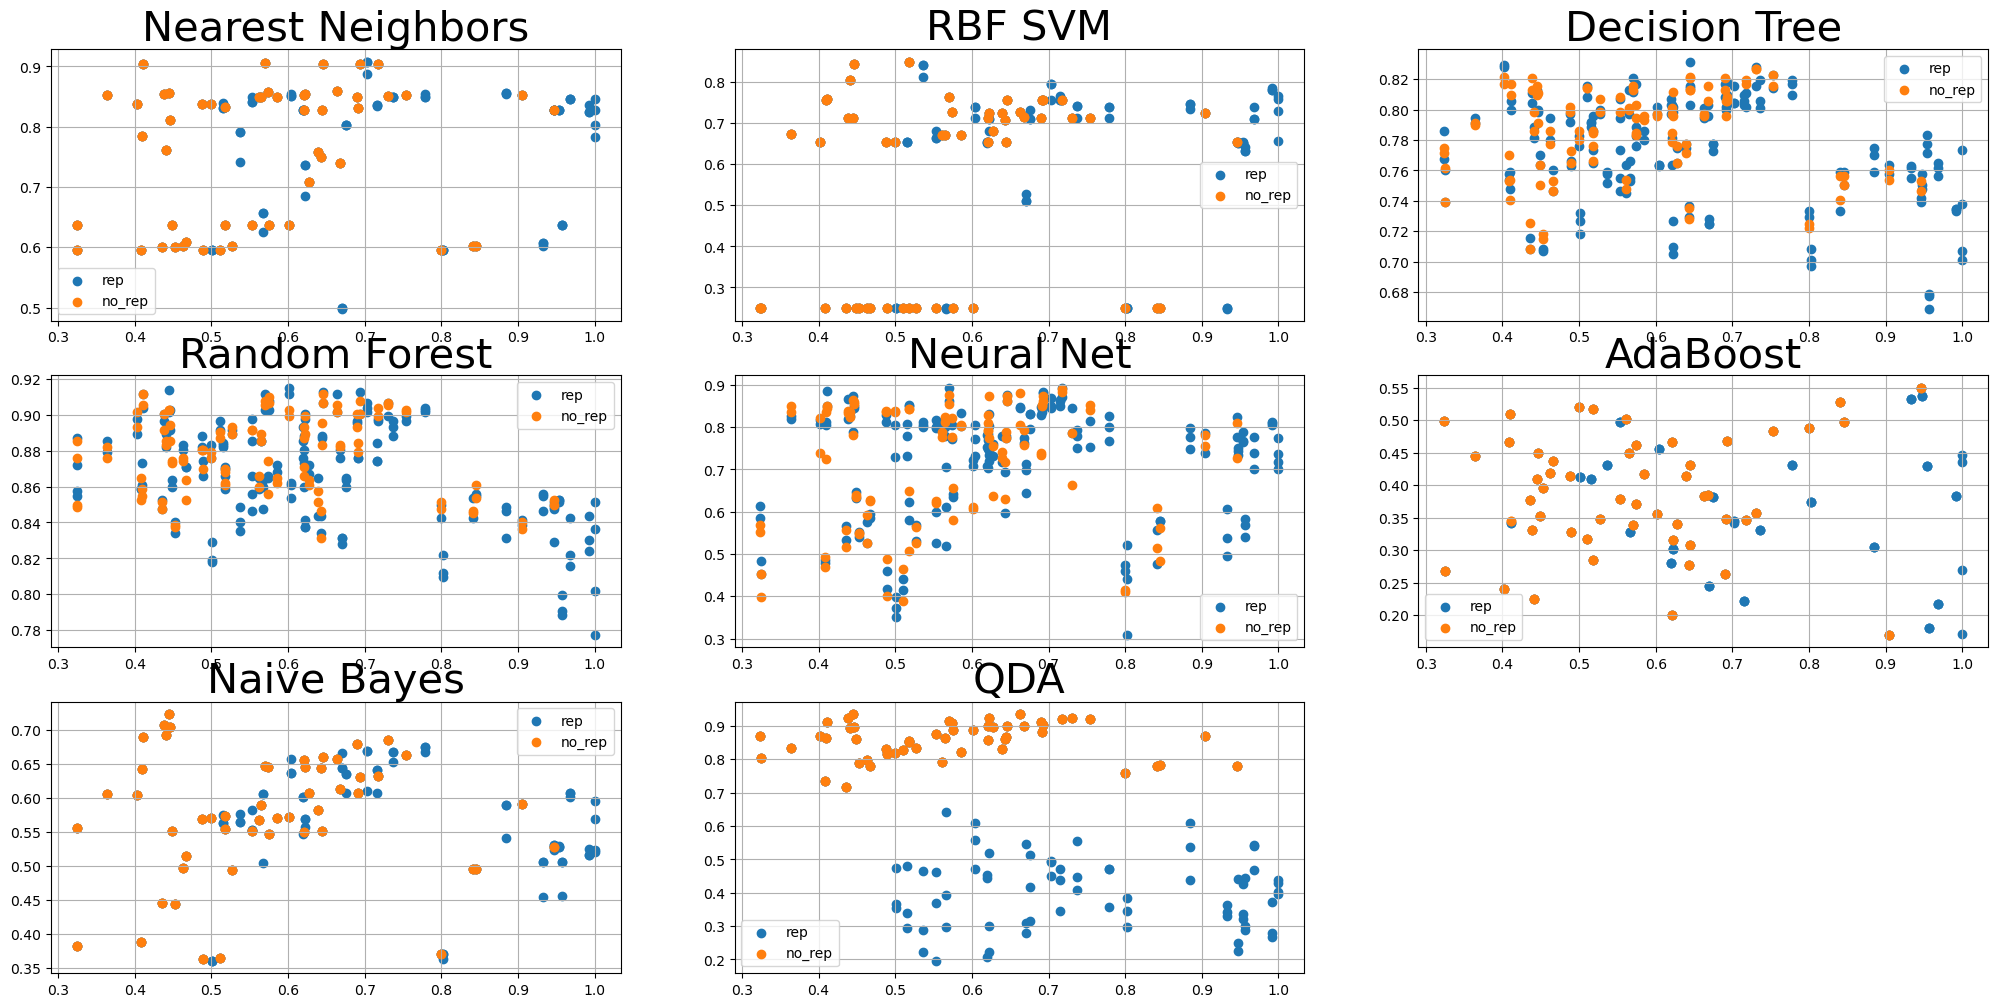

In [64]:
plt.figure(figsize=(25,12))

for i in range(len(names)):
    plt.subplot(3,3,i+1)
    plt.scatter(table_repetitions['corr'],table_repetitions[names[i]])
    plt.scatter(table_no_rep['corr'],table_no_rep[names[i]])
    plt.legend(['rep','no_rep'], fontsize=10)
    plt.title(names[i], fontsize=30)
    plt.grid(True)

# Optimization of QDA is only possible through regularization

When adjusting reg_param there is significant change in the points which involve the repetition of features (ie entropy,entropy,wl). regularization increases the accuracy of the worse performing points while doenst really affect the good points. 

When plotted without repeating features regularization didnt change much.


Therefore pointless?


QDA: -0.43

QDA: -0.27

QDA: -0.19

QDA: -0.10

QDA: -0.10


Text(0.5, 1.0, 'reg_param = 0.1')

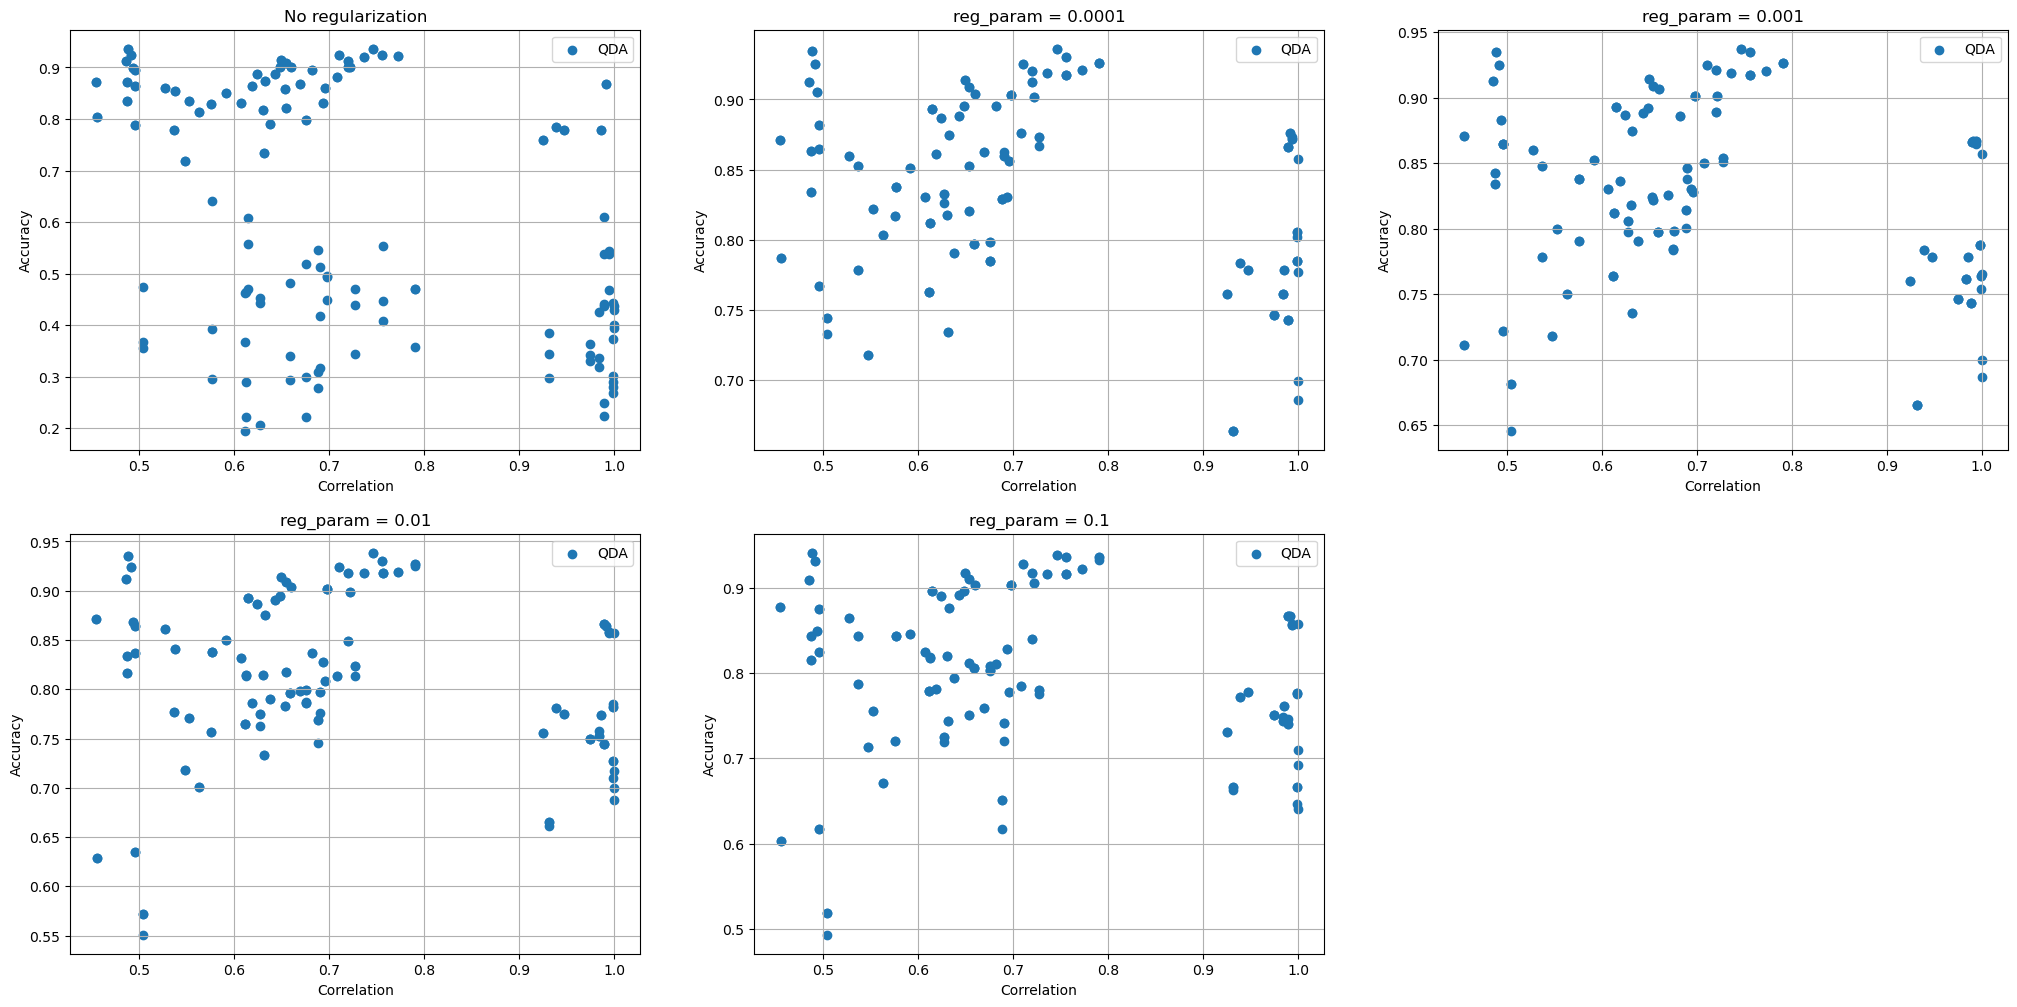

In [22]:
plt.figure(figsize=(25,12))

plt.subplot(2,3,1)
qda_opt = three_feat_cor(data,features, ['QDA'], avg_sig.corr(), 
                         [QuadraticDiscriminantAnalysis(reg_param=0)], repetition=True, plot=True)
plt.title('No regularization')
plt.subplot(2,3,2)
qda_opt1 = three_feat_cor(data,features, ['QDA'], avg_sig.corr(), 
                         [QuadraticDiscriminantAnalysis(reg_param=0.0001)], repetition=True, plot=True)
plt.title('reg_param = 0.0001')
plt.subplot(2,3,3)
qda_opt2 = three_feat_cor(data,features, ['QDA'], avg_sig.corr(), 
                          [QuadraticDiscriminantAnalysis(reg_param=0.001)], repetition=True, plot=True)
plt.title('reg_param = 0.001')
plt.subplot(2,3,4)
qda_opt3 = three_feat_cor(data,features, ['QDA'], avg_sig.corr(), 
                         [QuadraticDiscriminantAnalysis(reg_param=0.01)], repetition=True, plot=True)
plt.title('reg_param = 0.01')
plt.subplot(2,3,5)
qda_opt4 = three_feat_cor(data,features, ['QDA'], avg_sig.corr(), 
                         [QuadraticDiscriminantAnalysis(reg_param=0.1)], repetition=True, plot=True)
plt.title('reg_param = 0.1')

# RF optimazation

    Notes:  criterion: gini/entropy doesnt make any substantial change

            n_estimators: 100->10 => decreases avg acc by 0.03, max acc by 0.02, decreases time by 7 times (1:10->0:10)
        


Random Forest: -0.46

Time taken: 1:38.51

n_estimators = 100, acc = 0.91, mean = 0.87, std = 0.03

Random Forest: -0.30

Time taken: 0:11.42

n_estimators = 10, acc = 0.90, mean = 0.83, std = 0.03


Text(0.5, 1.0, 'n_estimators=10')

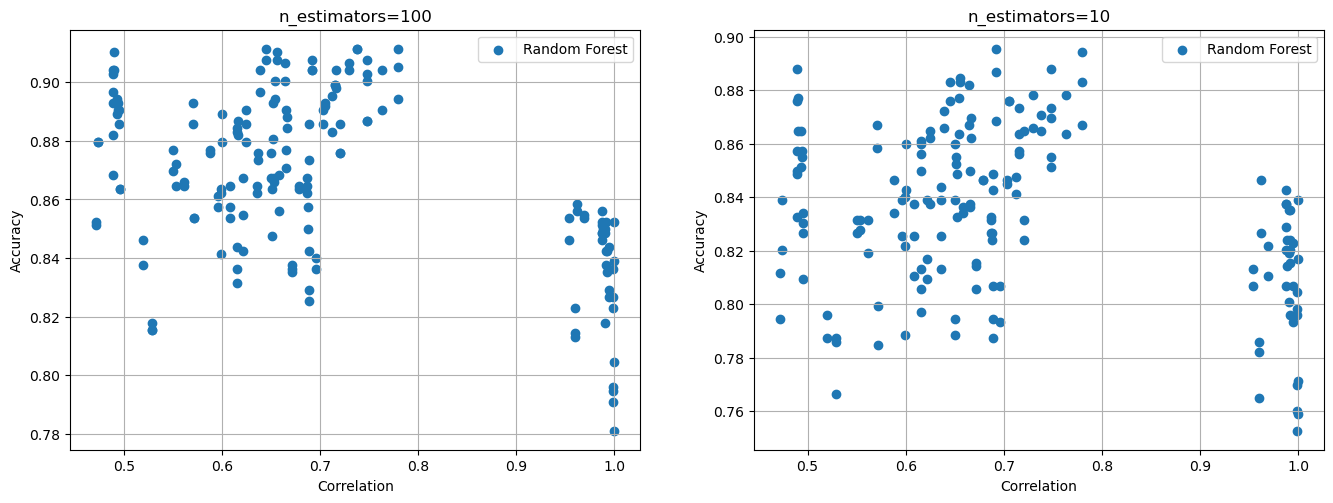

In [109]:
plt.figure(figsize=(25,12))


plt.subplot(2,3,1)
start = time.time()
rf_opt = three_feat_cor(data,features, ['Random Forest'], avg_sig.corr(), 
                         [RandomForestClassifier()], repetition=True, plot=True)
end = time.time() - start

end = end/60

print()
hours = int(end)
minutes = (end*60) % 60
seconds = (end*3600) % 60

print("Time taken: %d:%02d.%02d" % (hours, minutes, seconds))
print()
print('n_estimators = 100, acc = {:.2f}, mean = {:.2f}, std = {:.2f}'
      .format(rf_opt['Random Forest'].max(),rf_opt['Random Forest'].mean(),rf_opt['Random Forest'].std()))

plt.title('n_estimators=100')
plt.subplot(2,3,2)
start = time.time()
rf_opt1 = three_feat_cor(data,features, ['Random Forest'], avg_sig.corr(), 
                         [RandomForestClassifier(n_estimators=10)], repetition=True, plot=True)
end = time.time() - start

end = end/60
print()
hours = int(end)
minutes = (end*60) % 60
seconds = (end*3600) % 60

print("Time taken: %d:%02d.%02d" % (hours, minutes, seconds))
print()
print('n_estimators = 10, acc = {:.2f}, mean = {:.2f}, std = {:.2f}'
      .format(rf_opt1['Random Forest'].max(),rf_opt1['Random Forest'].mean(),rf_opt1['Random Forest'].std()))
plt.title('n_estimators=10')


Random Forest: -0.23

Time taken: 2:06.23

n_estimators = 100, acc = 0.91, mean = 0.88, std = 0.02

Random Forest: -0.05

Time taken: 0:14.44

n_estimators = 10, acc = 0.90, mean = 0.85, std = 0.02


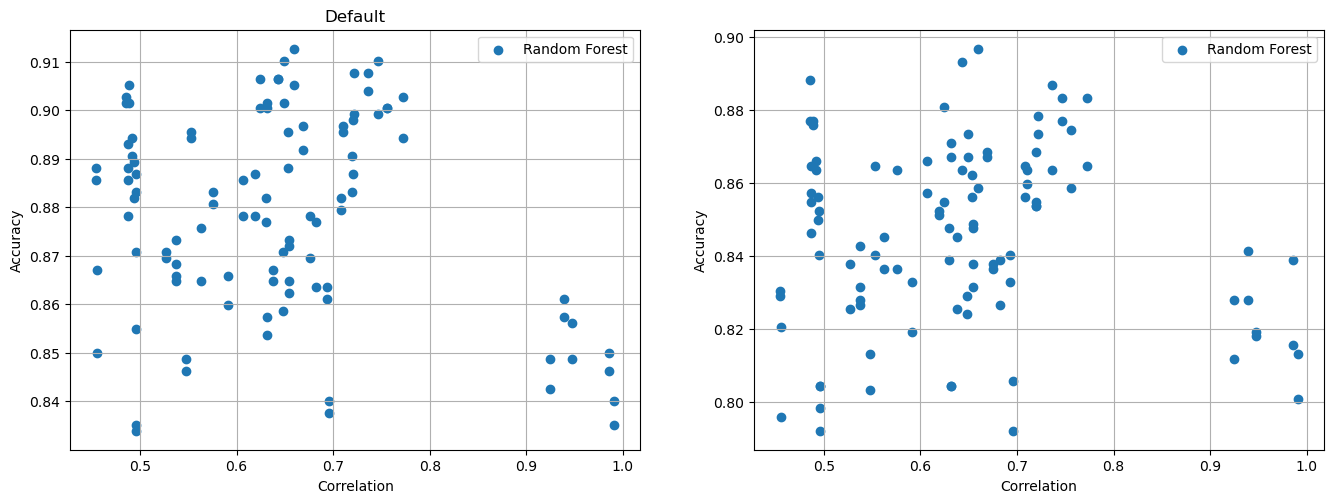

In [39]:
plt.figure(figsize=(25,12))


plt.subplot(2,3,1)
start = time.time()
rf_opt2 = three_feat_cor(data,features, ['Random Forest'], avg_sig.corr(), 
                         [RandomForestClassifier()], repetition=False, plot=True)
end = time.time() - start

end = end/60

print()
hours = int(end)
minutes = (end*60) % 60
seconds = (end*3600) % 60

print("Time taken: %d:%02d.%02d" % (hours, minutes, seconds))
print()
print('n_estimators = 100, acc = {:.2f}, mean = {:.2f}, std = {:.2f}'
      .format(rf_opt2['Random Forest'].max(),rf_opt2['Random Forest'].mean(),rf_opt2['Random Forest'].std()))

plt.title('Default')
plt.subplot(2,3,2)
start = time.time()
rf_opt3 = three_feat_cor(data,features, ['Random Forest'], avg_sig.corr(), 
                         [RandomForestClassifier(n_estimators=10)], repetition=False, plot=True)
end = time.time() - start

end = end/60
print()
hours = int(end)
minutes = (end*60) % 60
seconds = (end*3600) % 60

print("Time taken: %d:%02d.%02d" % (hours, minutes, seconds))
print()
print('n_estimators = 10, acc = {:.2f}, mean = {:.2f}, std = {:.2f}'
      .format(rf_opt3['Random Forest'].max(),rf_opt3['Random Forest'].mean(),rf_opt3['Random Forest'].std()))

# Standardize data

In [43]:
scale = StandardScaler()
scaled = pd.DataFrame(scale.fit_transform(df))

scaled_train, scaled_test, scaled_y_train, scaled_y_test, scaled_total = train_test_data(scaled,y)
scaled_data = [scaled_train, scaled_test, scaled_y_train, scaled_y_test, scaled_total]

avg_sig = correlation_table(scaled_total)


Nearest Neighbors: 0.48
RBF SVM: -0.27
Decision Tree: -0.07
Random Forest: -0.15
Neural Net: -0.14
AdaBoost: 0.10
Naive Bayes: -0.18
QDA: -0.00

Time taken: 5:43.02



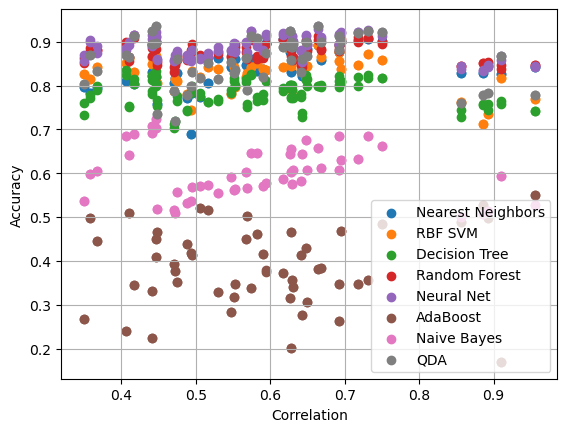

In [55]:
features = ['entropy','mav','wl','ssc','variance','tm3','logd','zc']

start = time.time()
table_no_rep_scale = three_feat_cor(scaled_data,features, names, avg_sig, classifiers, repetition=False, plot=True)
end = time.time() - start

end = end/60

print()
hours = int(end)
minutes = (end*60) % 60
seconds = (end*3600) % 60

print("Time taken: %d:%02d.%02d" % (hours, minutes, seconds))
print()


Nearest Neighbors: 0.23
RBF SVM: -0.49
Decision Tree: -0.30
Random Forest: -0.44
Neural Net: -0.43
AdaBoost: -0.05
Naive Bayes: -0.33
QDA: -0.47

Time taken: 9:29.11



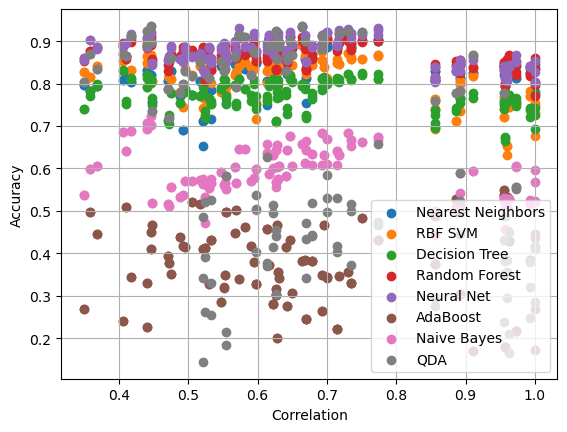

In [53]:
features = ['entropy','mav','wl','ssc','variance','tm3','logd','zc']

start = time.time()
table_rep_scale = three_feat_cor(scaled_data,features, names, avg_sig, classifiers, repetition=True, plot=True)
end = time.time() - start

end = end/60

print()
hours = int(end)
minutes = (end*60) % 60
seconds = (end*3600) % 60

print("Time taken: %d:%02d.%02d" % (hours, minutes, seconds))
print()

# KNN 


KNN: 0.48

Time taken: 0:08.51


KNN: 0.23

Time taken: 0:15.02



Text(0.5, 1.0, 'Repetition')

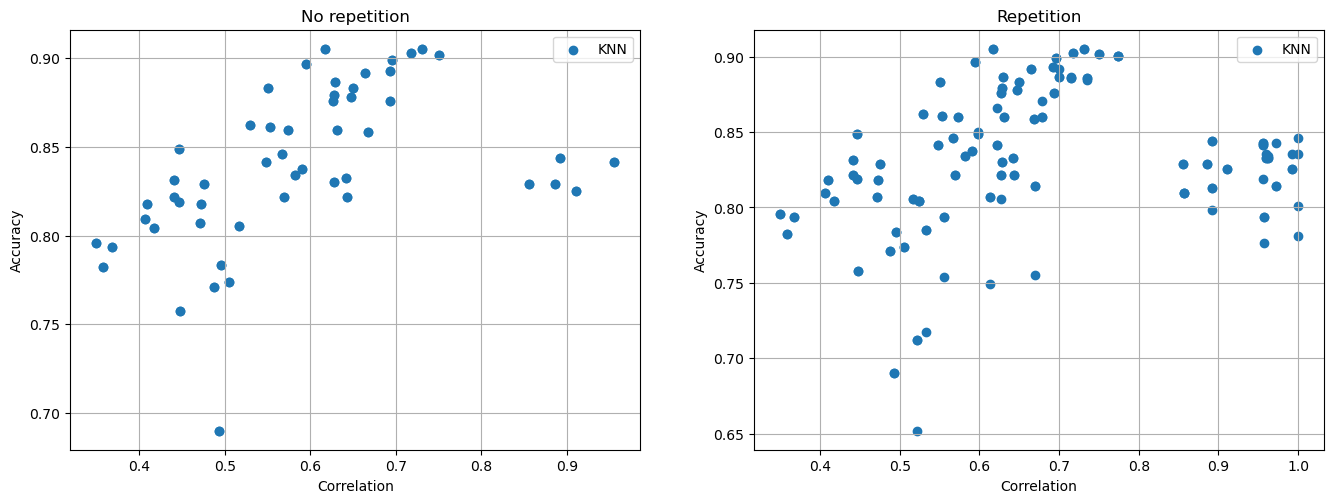

In [67]:
features = ['entropy','mav','wl','ssc','variance','tm3','logd','zc']
plt.figure(figsize=(25,12))
plt.subplot(2,3,1)
start = time.time()
table_no_rep_scale = three_feat_cor(scaled_data,features, ['KNN'], avg_sig, [KNeighborsClassifier()], repetition=False, plot=True)
end = time.time() - start

end = end/60

print()
hours = int(end)
minutes = (end*60) % 60
seconds = (end*3600) % 60

print("Time taken: %d:%02d.%02d" % (hours, minutes, seconds))
print()
plt.title('No repetition')
plt.subplot(2,3,2)
start = time.time()
KNN_REP = three_feat_cor(scaled_data,features, ['KNN'], avg_sig, [KNeighborsClassifier()], repetition=True, plot=True)
end = time.time() - start

end = end/60

print()
hours = int(end)
minutes = (end*60) % 60
seconds = (end*3600) % 60

print("Time taken: %d:%02d.%02d" % (hours, minutes, seconds))
print()
plt.title('Repetition')

In [108]:
table_no_rep_scale.sort_values(by='KNN',ascending=True).head(20)

feat1     feat2     feat3      corr       var       KNN
90   variance        zc       tm3  0.492996  1.365246  0.690037
83   variance       tm3        zc  0.492996  1.365246  0.690037
103      logd        zc       tm3  0.447243  1.055707  0.757688
100      logd       tm3        zc  0.447243  1.055707  0.757688
81   variance       tm3       ssc  0.487753  1.497226  0.771218
77   variance       ssc       tm3  0.487753  1.497226  0.771218
91   variance        zc      logd  0.505477  1.303943  0.773678
87   variance      logd        zc  0.505477  1.303943  0.773678
70         wl        zc       tm3  0.358041  0.325738  0.782288
61         wl       tm3        zc  0.358041  0.325738  0.782288
75   variance       mav        zc  0.495333  1.365969  0.783518
88   variance        zc       mav  0.495333  1.365969  0.783518
79   variance       ssc        zc  0.367717  0.411881  0.793358
89   variance        zc       ssc  0.367717  0.411881  0.793358
29    entropy       tm3        zc  0.349561  0.495457  0.795818
40    entropy        zc       tm3  0.349561  0.495457  0.795818
69         wl        zc  variance  0.417457  0.535693  0.804428
56         wl  variance        zc  0.417457  0.535693  0.804428
94       logd       mav        zc  0.516369  1.457157  0.805658
101      logd        zc       mav  0.516369  1.457157  0.805658